# fMRI Data Visualization with Julia in Minutes


## Introduction

Recently, I needed to investigate an fMRI research[1] and data which is collected from people who are reading a Harry Potter chapter. The words are  shown to people one by one by blurring other words around. The work has demonstrated that, given hardcoded language features and visual features of two words, one can distinguish which word the reader reads at a time by looking fMRI data. 

The first day I started to investigate this data, I was lucky enough to be in [Julia Lab](https://julia.mit.edu) at MIT. I got [Simon Danisch](https://github.com/SimonDanisch)'s, who has written awesome [Makie.jl](https://github.com/JuliaPlots/Makie.jl) plotting package, example script to visualize another 3D stream data. It took 30 minutes to edit this example code and visualize my fMRI data without any external processing tool. So, let see how easy to visualize this data on Julia.

## Setup

### Downloading Data

Here, we will download the raw fMRI data of `subject_1` from accompanying website of the paper


In [9]:
server = "http://www.cs.cmu.edu/afs/cs/project/theo-73/www/plosone/files/"
download(server*"subject_1.mat","./subject_1.mat")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 50.3M  100 50.3M    0     0   830k      0  0:01:02  0:01:02 --:--:--  961k   827k      0  0:01:02  0:00:53  0:00:09  663k


"./subject_1.mat"

### Installing&Adding Packages

We install  MAT.jl which is a package to read MATLAB data and it isn't working on Julia 1.0 version yet. So, we download it from another source which is working fine for now. We also install Makie.jl and its dependencies.


In [21]:
pkg"add GeometryTypes#master Observables#master AbstractPlotting#master Makie#master https://github.com/halleysfifthinc/MAT.jl#v0.7-update"

  Updating git-repo `https://github.com/JuliaGeometry/GeometryTypes.jl.git`
  Updating git-repo `https://github.com/JuliaGizmos/Observables.jl.git`
  Updating git-repo `https://github.com/JuliaPlots/AbstractPlotting.jl.git`
  Updating git-repo `https://github.com/JuliaPlots/Makie.jl.git`
  Updating git-repo `https://github.com/halleysfifthinc/MAT.jl`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


Including required packages to the current workspace

In [11]:
using Makie, GeometryTypes, Observables
using AbstractPlotting: slider!, playbutton, vbox, hbox!
using MAT

## Data Preperation

Subject's data is a matrix which holds voxel activation values for each time. Rows corresponds to different time and Columns corresponds to different voxels. You could check `subject["meta"]` to get more meta information about whole data.

In [12]:
subject = matread("./data/subject_1.mat");
data    = subject["data"]

1351×37913 Array{Float64,2}:
 62.0  48.0  23.0  39.0  45.0   83.0  37.0  …    4.0  17.0  15.0  36.0   94.0
 70.0  44.0  21.0  46.0  53.0   85.0  42.0      11.0  12.0  20.0  41.0  100.0
 66.0  49.0  11.0  37.0  58.0   96.0  30.0      12.0   9.0  14.0  24.0   97.0
 57.0  61.0  30.0  44.0  55.0  100.0  38.0       8.0  15.0   5.0  32.0  102.0
 75.0  53.0  27.0  45.0  63.0   93.0  40.0      13.0  14.0  16.0  27.0   92.0
 61.0  47.0  20.0  44.0  51.0   94.0  43.0  …   -1.0   8.0  16.0  26.0   98.0
 64.0  50.0  20.0  37.0  57.0   98.0  40.0       0.0   6.0  13.0  33.0   98.0
 70.0  56.0  29.0  43.0  59.0   98.0  32.0       6.0   9.0  16.0  32.0   99.0
 64.0  49.0  25.0  42.0  49.0   91.0  40.0      15.0  18.0  13.0  26.0   91.0
 63.0  54.0  19.0  45.0  60.0   83.0  36.0       7.0  17.0  13.0  26.0   92.0
 65.0  47.0  17.0  41.0  53.0   89.0  41.0  …    1.0  13.0  16.0  24.0   85.0
 58.0  50.0  30.0  48.0  52.0   99.0  42.0       1.0   5.0   4.0  27.0   86.0
 66.0  52.0  27.0  40.0  64.0   96.

T is #of time steps and V is #of voxels. Each time step is a 2 seconds interval. Voxel locations are investigated in next cell.

In [13]:
T,V = size(data)

(1351, 37913)

### Voxel Locations

`subject["meta"]["colToCoord"]` is a `Vx3` matrix which corresponds to voxel locations for each voxel. I converted it to an array of CartesianIndex to make next steps easy.

In [14]:
colToCoord = vec(mapslices(x->CartesianIndex(Tuple(Int.(x))),subject["meta"]["colToCoord"]; dims=2))

37913-element Array{CartesianIndex{3},1}:
 CartesianIndex(3, 23, 22) 
 CartesianIndex(3, 23, 23) 
 CartesianIndex(3, 24, 21) 
 CartesianIndex(3, 24, 22) 
 CartesianIndex(3, 24, 23) 
 CartesianIndex(3, 24, 26) 
 CartesianIndex(3, 24, 27) 
 CartesianIndex(3, 25, 21) 
 CartesianIndex(3, 25, 22) 
 CartesianIndex(3, 25, 23) 
 CartesianIndex(3, 25, 24) 
 CartesianIndex(3, 25, 26) 
 CartesianIndex(3, 25, 27) 
 ⋮                         
 CartesianIndex(50, 34, 18)
 CartesianIndex(50, 34, 19)
 CartesianIndex(50, 34, 20)
 CartesianIndex(50, 34, 21)
 CartesianIndex(50, 34, 23)
 CartesianIndex(50, 34, 24)
 CartesianIndex(50, 34, 25)
 CartesianIndex(50, 35, 21)
 CartesianIndex(50, 35, 22)
 CartesianIndex(51, 27, 24)
 CartesianIndex(51, 28, 24)
 CartesianIndex(51, 29, 24)

Sizes of the 3D rectangular parallelepiped which encloses all voxels.

In [15]:
lx,ly,lz=maximum(Int.(subject["meta"]["colToCoord"]);dims=1)

1×3 Array{Int64,2}:
 51  60  50

### Time Series of 3D Spatial Voxel Data

We have voxel activation data and voxel locations. We need to create 3D arrays size of (lx,ly,lz) and fill their voxel locations with activation values. Then, we repeat this for all time steps. 


In [8]:
fmri_time_series  = map(1:T) do i
                        voxels = zeros(lx,ly,lz)
                        voxels[colToCoord] = data[i,:]; 
                        voxels
                    end;

In [9]:
typeof(fmri_time_series)

Array{Array{Float64,3},1}

### Normalization

 We normalize activation values data between 0-1 to display correctly.

In [10]:
fm = fmri_time_series
mini, maxi = mapreduce(extrema, (a, b)-> (min(a[1], b[1]), max(a[2], b[2])), fm)
fm_n = map(fm) do vol
    Float32.((vol .- mini) ./ (maxi - mini))
end
ex_volume = first(fm_n);

## Visualization

Plotting and GUI with Makie.jl. Many thanks to [Simon Danisch](https://github.com/SimonDanisch)


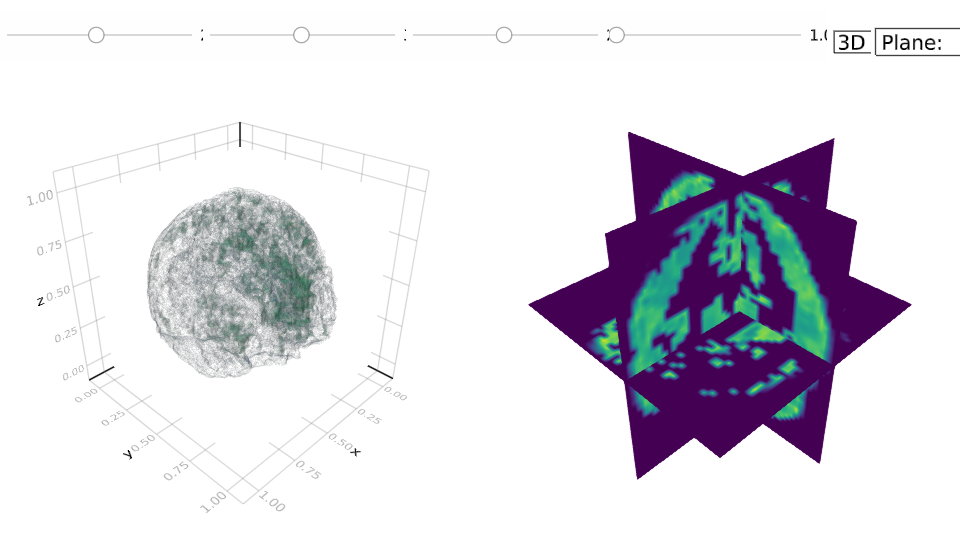

clicks = 1
clicks = 2
clicks = 3
clicks = 4
clicks = 5


In [11]:
style = Theme(raw = true, camera = campixel!)

# 3D Brain Image
axis    = range(0, stop = 1, length = size(ex_volume, 1))
scene3d = contour(axis, axis, axis, ex_volume, alpha = 0.1, levels = 4)
cntr    = last(scene3d);
volume  = cntr[4]

# Heatmap Slices and Their Sliders
axis2  = range(-1, stop = 1, length = size(ex_volume, 1))
hscene = Scene(camera = cam3d!, show_axis = false)
planes = (:xy, :xz, :yz)

# XY-XZ-YZ Planes' Sliders
sliders = ntuple(3) do i
  
    s_scene = slider(style, 1:size(volume[], i), start = size(volume[], i) ÷ 2)
    s = last(s_scene)
    idx = s[:value]; 
    
    plane = planes[i]
    
    indices = map(1:3) do j; planes[j] == plane ? 1 : (:); end
    
    hmap = last(heatmap!(
               hscene, axis2, axis2, volume[][indices...],
               fillrange = true, interpolate = true
           ))
    
    lift(idx, volume) do _idx, vol
        idx = (i in (1, 2)) ? (size(vol, i) - _idx) + 1 : _idx
        transform!(hmap, (plane, axis2[_idx]))
        indices = map(1:3) do j; planes[j] == plane ? idx : (:); end
        if checkbounds(Bool, vol, indices...)
            hmap[3][] = view(vol, indices...)
        end
    end
    s_scene
end

# Time Step Slider
t = slider(style, 1:length(fm_n))
tslider = last(t)

lift(tslider[:value]) do idx
    if checkbounds(Bool, fm_n, idx)
        volume[] = fm_n[idx]
    end
end

#XY-XZ-YZ  Planes Toggle Button
b1 = button(style, "Plane:     "; dimensions = (150, 150))
on(b1[end][:clicks]) do clicks
    if b2.plots[1][1][] == "2D"
        cam3d!(hscene)
        cam = cameracontrols(hscene) 
        cam.projectiontype[] = AbstractPlotting.Orthographic
        if clicks % 3 == 1
            cam.upvector[] = Vec3f0(0, 0, 1)
            cam.eyeposition[] = Vec3f0(0, 300, 0)
            cam.lookat[] = Vec3f0(0, 0, 0)
            b1.plots[1][1][] = "Plane: XZ"
        elseif clicks % 3 == 0
            cam.upvector[] = Vec3f0(1, 0, 0)
            cam.eyeposition[] = Vec3f0(0, 0, 300)
            cam.lookat[] = Vec3f0(0, 0, 0)
            b1.plots[1][1][] = "Plane: YZ"
        elseif clicks % 3 == 2
            cam.upvector[] = Vec3f0(0, 0, 1)
            cam.eyeposition[] = Vec3f0(300, 0, 0)
            cam.lookat[] = Vec3f0(0, 0, 0)
            b1.plots[1][1][] = "Plane: XY"
        end     
        update_cam!(hscene, cam)
    end
end

# 3D/2D Toggle Button
b2 = button(style, "3D"; dimensions = (100, 100))
on(b2[end][:clicks]) do clicks
    @show clicks
    if iseven(clicks)
        cam3d!(hscene)
        center!(hscene)
        b1.plots[1][1][] = "Plane: XYZ"
        b2.plots[1][1][] = "3D"
    else
        cam2d!(hscene)
        center!(hscene)
        cam3d!(hscene)
        cam = cameracontrols(hscene) 
        cam.projectiontype[] = AbstractPlotting.Orthographic
        cam.upvector[] = Vec3f0(1, 0, 0)
        cam.eyeposition[] = Vec3f0(0, 0, 300)
        cam.lookat[] = Vec3f0(0, 0, 0)
        update_cam!(hscene, cam)
        b1.plots[1][1][] = "Plane: YZ"
        b2.plots[1][1][] = "2D"
    end 
end

#Layout  
hbox(
    vbox(scene3d, hscene),
    vbox(sliders...,t, b2, b1)
)

## Demo
Watch the demo!
[![Video](https://img.youtube.com/vi/IFUsbmXWlao/0.jpg)](https://www.youtube.com/watch?v=IFUsbmXWlao)

## Conclusion
It was very fun to have brain as a 3D and see voxel activations on it. Meanwhile, we also verified that language/reading related parts of the brain is located on left brain (assuming subjects are right handed).

## References
[1] Wehbe, Leila, et al. "Simultaneously uncovering the patterns of brain regions involved in different story reading subprocesses." PloS one 9.11 (2014)